In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
from keras import models
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[0].shape

(1,)

In [7]:
len(X_train)


50000

In [8]:
len(X_test)

10000

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
from keras.backend import flatten
model = models.Sequential([layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu', input_shape= (32,32,3)),
                           layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.MaxPooling2D((2,2)),layers.Flatten(),
                           layers.Dense(64,activation='softmax')])

In [11]:
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [13]:
model.fit(X_train,y_train,epochs=7)

Epoch 1/7
1563/1563 [==============================] - 17s 4ms/step - loss: 1.3836 - accuracy: 0.5123
Epoch 2/7
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0405 - accuracy: 0.6414
Epoch 3/7
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9352 - accuracy: 0.6757
Epoch 4/7
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8710 - accuracy: 0.7013
Epoch 5/7
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8134 - accuracy: 0.7195
Epoch 6/7
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7671 - accuracy: 0.7356
Epoch 7/7
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7258 - accuracy: 0.7521


In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8779 - accuracy: 0.7035


[0.8779047131538391, 0.703499972820282]

prediction from testing datasets

In [15]:
predict = model.predict(X_test)

prediction for perticular image class (Max value of array)

In [16]:
predict[1500]

array([1.23766642e-06, 9.45747375e-01, 4.05164400e-08, 1.83934262e-07,
       2.92716429e-08, 5.97732850e-08, 2.45266989e-08, 9.82769961e-07,
       3.34391672e-07, 5.42496555e-02, 1.62350365e-24, 5.72234327e-25,
       2.18022557e-24, 1.04895278e-24, 1.35904158e-24, 7.43503967e-25,
       1.18477136e-24, 1.57646772e-24, 9.43926406e-25, 1.81557659e-24,
       1.97980934e-24, 6.70868061e-24, 1.05018991e-24, 2.03650832e-24,
       7.36511701e-25, 1.88828235e-24, 2.55916220e-24, 1.17818664e-24,
       1.46540458e-24, 7.44077173e-25, 7.28044906e-25, 1.17448905e-24,
       1.43270965e-24, 9.77388406e-25, 1.89585364e-24, 1.93105695e-24,
       2.30609148e-24, 7.50977980e-25, 2.69653464e-25, 3.84382238e-25,
       1.64993858e-24, 2.94313872e-25, 1.14668703e-24, 1.86785026e-24,
       2.75047576e-24, 3.93055049e-25, 1.30965761e-24, 1.28547833e-24,
       4.06282940e-25, 7.55010834e-25, 3.10132717e-24, 3.15312358e-24,
       1.31126728e-24, 2.52959786e-24, 1.18722353e-24, 1.41171934e-24,
      

prediction for perticular image class

In [17]:
import numpy as np
np.argmax(predict[1500])

1

crosschecking with actual data present in test dataset

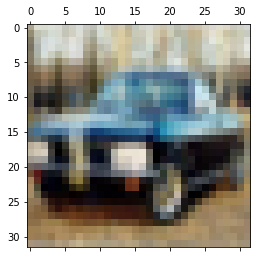

In [18]:
plt.matshow(X_test[1500])

cross_check

In [19]:
y_test[1500]

array([1], dtype=uint8)